### Imports

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read files

In [117]:
epex_df = pd.read_csv("epex_day_ahead_price.csv")
spot_df = pd.read_csv("spot_intraday_price.csv")
system_df = pd.read_csv("systemprice.csv")

# 1. Inspect Datasets and fix errors

### Epex Prices

In [118]:
epex_df

timestamp  apx_da_hourly
0      2019-03-31 23:00:00+00:00          26.43
1      2019-03-31 23:30:00+00:00          26.43
2      2019-04-01 00:00:00+00:00          29.24
3      2019-04-01 00:30:00+00:00          29.24
4      2019-04-01 01:00:00+00:00          35.10
...                          ...            ...
47853  2021-12-22 21:30:00+00:00         315.00
47854  2021-12-22 22:00:00+00:00         276.85
47855  2021-12-22 22:30:00+00:00         276.85
47856  2021-12-22 23:00:00+00:00         325.40
47857  2021-12-22 23:30:00+00:00         325.40

[47858 rows x 2 columns]

Get rid of first and last dates to match with other dataframes

In [119]:
epex_df = epex_df.iloc[338:-336].copy()
epex_df

timestamp  apx_da_hourly
338    2019-04-08 00:00:00+00:00          33.41
339    2019-04-08 00:30:00+00:00          33.41
340    2019-04-08 01:00:00+00:00          41.03
341    2019-04-08 01:30:00+00:00          41.03
342    2019-04-08 02:00:00+00:00          39.00
...                          ...            ...
47517  2021-12-15 21:30:00+00:00         258.30
47518  2021-12-15 22:00:00+00:00         231.80
47519  2021-12-15 22:30:00+00:00         231.80
47520  2021-12-15 23:00:00+00:00         231.00
47521  2021-12-15 23:30:00+00:00         231.00

[47184 rows x 2 columns]

In [120]:
epex_df.describe()

apx_da_hourly
count   47184.000000
mean       63.408615
std        65.787193
min       -38.800000
25%        33.100000
50%        44.300000
75%        68.000000
max      1860.000000

Check if there are any nan values

In [121]:
epex_df.isnull().values.any()

False

### Spot Prices

In [122]:
spot_df

timestamp    SP  spot_price
0      2019-01-02 00:00:00+00:00   1.0       40.01
1      2019-01-02 00:30:00+00:00   2.0       43.27
2      2019-01-02 01:00:00+00:00   3.0       42.72
3      2019-01-02 01:30:00+00:00   4.0       52.17
4      2019-01-02 02:00:00+00:00   5.0       53.44
...                          ...   ...         ...
51835  2021-12-16 21:30:00+00:00  44.0      232.25
51836  2021-12-16 22:00:00+00:00  45.0      242.44
51837  2021-12-16 22:30:00+00:00  46.0      220.12
51838  2021-12-16 23:00:00+00:00  47.0      231.87
51839  2021-12-16 23:30:00+00:00  48.0      246.75

[51840 rows x 3 columns]

Get rid of first and last dates to match with other dataframes

In [123]:
spot_df = spot_df.iloc[4608:-48].copy()
spot_df

timestamp    SP  spot_price
4608   2019-04-08 00:00:00+00:00   3.0       40.45
4609   2019-04-08 00:30:00+00:00   4.0       43.69
4610   2019-04-08 01:00:00+00:00   5.0       46.13
4611   2019-04-08 01:30:00+00:00   6.0       43.96
4612   2019-04-08 02:00:00+00:00   7.0       44.36
...                          ...   ...         ...
51787  2021-12-15 21:30:00+00:00  44.0      231.98
51788  2021-12-15 22:00:00+00:00  45.0      238.32
51789  2021-12-15 22:30:00+00:00  46.0      213.15
51790  2021-12-15 23:00:00+00:00  47.0      218.80
51791  2021-12-15 23:30:00+00:00  48.0      157.07

[47184 rows x 3 columns]

In [124]:
spot_df.describe()

SP    spot_price
count  46810.000000  46810.000000
mean      24.508182     60.966664
std       13.851154     68.274426
min        1.000000   -101.620000
25%       13.000000     31.510000
50%       25.000000     43.470000
75%       37.000000     68.487500
max       48.000000   2975.060000

##### There seems to be something wrong wth the SP column, there is no need to deal with this now as we will merge datasets and use the other, correct SP column

Check if there are any nan values

In [125]:
spot_df.isnull().values.any()

True

Replace missing values with median, not mean - because the data is very skewed

In [126]:
spot_df.fillna(value = spot_df["spot_price"].median(),inplace=True)
spot_df.isnull().values.any()

False

### System Prices

In [127]:
system_df

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
0          08/04/2019                  1                     52.25   
1          08/04/2019                  2                     51.90   
2          08/04/2019                  3                     32.76   
3          08/04/2019                  4                     50.85   
4          08/04/2019                  5                     51.40   
...               ...                ...                       ...   
47181      15/12/2021                 44                    295.00   
47182      15/12/2021                 45                    176.55   
47183      15/12/2021                 46                    176.55   
47184      15/12/2021                 47                    350.00   
47185      15/12/2021                 48                    350.00   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
0                        52.25                   195.4258  
1                        51.90                    62.2486  
2                        32.76                   -40.7968  
3                        50.85                    22.6933  
4                        51.40                   186.5092  
...                        ...                        ...  
47181                   295.00                    47.1667  
47182                   176.55                  -239.7501  
47183                   176.55                  -297.1255  
47184                   350.00                    65.4437  
47185                   350.00                   336.3496  

[47186 rows x 5 columns]

Check if there are any nan values

In [128]:
system_df.isnull().values.any()

False

### Deal with the extra data in the system prices dataset

Row count does not match the others. Inspect:

In [129]:
system_df["Settlement Period"].value_counts()

1     983
36    983
27    983
28    983
29    983
30    983
31    983
32    983
33    983
34    983
35    983
37    983
25    983
38    983
39    983
40    983
41    983
42    983
43    983
44    983
45    983
46    983
2     983
26    983
24    983
12    983
3     983
4     983
5     983
6     983
7     983
8     983
9     983
10    983
23    983
11    983
13    983
14    983
15    983
16    983
17    983
18    983
19    983
20    983
21    983
22    983
47    981
48    981
49      3
50      3
Name: Settlement Period, dtype: int64

Seems there is some extra and missing data

In [130]:
system_df.loc[ system_df["Settlement Period"] == 49]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
9744       27/10/2019                 49                     17.00   
27216      25/10/2020                 49                     17.34   
45024      31/10/2021                 49                     16.90   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
9744                     17.00                   -79.4619  
27216                    17.34                  -477.2735  
45024                    16.90                  -424.3871

In [131]:
system_df.loc[ system_df["Settlement Period"] == 50]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
9745       27/10/2019                 50                     45.00   
27217      25/10/2020                 50                     14.71   
45025      31/10/2021                 50                     16.90   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
9745                     45.00                   105.5561  
27217                    14.71                  -760.7069  
45025                    16.90                  -444.9254

In [132]:
system_df.iloc[9740:9750]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
9740      27/10/2019                 45                  58.92796   
9741      27/10/2019                 46                  16.25000   
9742      27/10/2019                 47                  48.50000   
9743      27/10/2019                 48                  47.50000   
9744      27/10/2019                 49                  17.00000   
9745      27/10/2019                 50                  45.00000   
9746      28/10/2019                  1                  22.66000   
9747      28/10/2019                  2                  24.06000   
9748      28/10/2019                  3                  24.34000   
9749      28/10/2019                  4                  22.17000   

      System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
9740                 58.92796                   290.9965  
9741                 16.25000                   -84.4829  
9742                 48.50000                   376.2955  
9743                 47.50000                   247.2096  
9744                 17.00000                   -79.4619  
9745                 45.00000                   105.5561  
9746                 22.66000                  -342.0250  
9747                 24.06000                  -212.9334  
9748                 24.34000                  -117.4583  
9749                 22.17000                  -277.2544

In [133]:
system_df.iloc[27210:27220]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
27210      25/10/2020                 43                      2.20   
27211      25/10/2020                 44                     18.00   
27212      25/10/2020                 45                     20.20   
27213      25/10/2020                 46                      3.95   
27214      25/10/2020                 47                     20.86   
27215      25/10/2020                 48                      5.00   
27216      25/10/2020                 49                     17.34   
27217      25/10/2020                 50                     14.71   
27218      26/10/2020                  1                     13.12   
27219      26/10/2020                  2                     15.09   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
27210                     2.20                  -603.6744  
27211                    18.00                  -534.3983  
27212                    20.20                  -967.2610  
27213                     3.95                  -842.2514  
27214                    20.86                  -603.4282  
27215                     5.00                 -1016.4918  
27216                    17.34                  -477.2735  
27217                    14.71                  -760.7069  
27218                    13.12                  -716.9055  
27219                    15.09                  -330.1523

In [134]:
system_df.iloc[45020:45030]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
45020      31/10/2021                 45                    175.00   
45021      31/10/2021                 46                     76.00   
45022      31/10/2021                 47                     30.92   
45023      31/10/2021                 48                      0.00   
45024      31/10/2021                 49                     16.90   
45025      31/10/2021                 50                     16.90   
45026      01/11/2021                  1                      0.00   
45027      01/11/2021                  2                      1.00   
45028      01/11/2021                  3                     -3.44   
45029      01/11/2021                  4                     -8.52   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
45020                   175.00                   341.7950  
45021                    76.00                   -25.3079  
45022                    30.92                  -357.9742  
45023                     0.00                  -616.3338  
45024                    16.90                  -424.3871  
45025                    16.90                  -444.9254  
45026                     0.00                  -516.4873  
45027                     1.00                  -436.4728  
45028                    -3.44                  -424.9166  
45029                    -8.52                  -529.8139

#### Drop the aforementioned rows

In [135]:
system_df_copy = system_df.copy()

In [136]:
system_df_copy.drop([9744,9745,27216,27217,45024,45025], inplace=True)

In [137]:
system_df_copy.reset_index(inplace=True)
system_df_copy.drop("index", axis=1,inplace=True)

In [138]:
system_df_copy

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
0          08/04/2019                  1                     52.25   
1          08/04/2019                  2                     51.90   
2          08/04/2019                  3                     32.76   
3          08/04/2019                  4                     50.85   
4          08/04/2019                  5                     51.40   
...               ...                ...                       ...   
47175      15/12/2021                 44                    295.00   
47176      15/12/2021                 45                    176.55   
47177      15/12/2021                 46                    176.55   
47178      15/12/2021                 47                    350.00   
47179      15/12/2021                 48                    350.00   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
0                        52.25                   195.4258  
1                        51.90                    62.2486  
2                        32.76                   -40.7968  
3                        50.85                    22.6933  
4                        51.40                   186.5092  
...                        ...                        ...  
47175                   295.00                    47.1667  
47176                   176.55                  -239.7501  
47177                   176.55                  -297.1255  
47178                   350.00                    65.4437  
47179                   350.00                   336.3496  

[47180 rows x 5 columns]

In [139]:
k = 0
for i in range(system_df_copy.shape[0]):
    k += 1
    if system_df_copy["Settlement Period"][i] != k:
        print(k, system_df_copy["Settlement Period"][i], i)
    if k == 48:
        k = 0


47 1 17134
48 2 17135
1 3 17136
2 4 17137
3 5 17138
4 6 17139
5 7 17140
6 8 17141
7 9 17142
8 10 17143
9 11 17144
10 12 17145
11 13 17146
12 14 17147
13 15 17148
14 16 17149
15 17 17150
16 18 17151
17 19 17152
18 20 17153
19 21 17154
20 22 17155
21 23 17156
22 24 17157
23 25 17158
24 26 17159
25 27 17160
26 28 17161
27 29 17162
28 30 17163
29 31 17164
30 32 17165
31 33 17166
32 34 17167
33 35 17168
34 36 17169
35 37 17170
36 38 17171
37 39 17172
38 40 17173
39 41 17174
40 42 17175
41 43 17176
42 44 17177
43 45 17178
44 46 17179
45 47 17180
46 48 17181
47 1 17182
48 2 17183
1 3 17184
2 4 17185
3 5 17186
4 6 17187
5 7 17188
6 8 17189
7 9 17190
8 10 17191
9 11 17192
10 12 17193
11 13 17194
12 14 17195
13 15 17196
14 16 17197
15 17 17198
16 18 17199
17 19 17200
18 20 17201
19 21 17202
20 22 17203
21 23 17204
22 24 17205
23 25 17206
24 26 17207
25 27 17208
26 28 17209
27 29 17210
28 30 17211
29 31 17212
30 32 17213
31 33 17214
32 34 17215
33 35 17216
34 36 17217
35 37 17218
36 38 17219
37 3

14 16 18157
15 17 18158
16 18 18159
17 19 18160
18 20 18161
19 21 18162
20 22 18163
21 23 18164
22 24 18165
23 25 18166
24 26 18167
25 27 18168
26 28 18169
27 29 18170
28 30 18171
29 31 18172
30 32 18173
31 33 18174
32 34 18175
33 35 18176
34 36 18177
35 37 18178
36 38 18179
37 39 18180
38 40 18181
39 41 18182
40 42 18183
41 43 18184
42 44 18185
43 45 18186
44 46 18187
45 47 18188
46 48 18189
47 1 18190
48 2 18191
1 3 18192
2 4 18193
3 5 18194
4 6 18195
5 7 18196
6 8 18197
7 9 18198
8 10 18199
9 11 18200
10 12 18201
11 13 18202
12 14 18203
13 15 18204
14 16 18205
15 17 18206
16 18 18207
17 19 18208
18 20 18209
19 21 18210
20 22 18211
21 23 18212
22 24 18213
23 25 18214
24 26 18215
25 27 18216
26 28 18217
27 29 18218
28 30 18219
29 31 18220
30 32 18221
31 33 18222
32 34 18223
33 35 18224
34 36 18225
35 37 18226
36 38 18227
37 39 18228
38 40 18229
39 41 18230
40 42 18231
41 43 18232
42 44 18233
43 45 18234
44 46 18235
45 47 18236
46 48 18237
47 1 18238
48 2 18239
1 3 18240
2 4 18241
3 5 

33 35 19040
34 36 19041
35 37 19042
36 38 19043
37 39 19044
38 40 19045
39 41 19046
40 42 19047
41 43 19048
42 44 19049
43 45 19050
44 46 19051
45 47 19052
46 48 19053
47 1 19054
48 2 19055
1 3 19056
2 4 19057
3 5 19058
4 6 19059
5 7 19060
6 8 19061
7 9 19062
8 10 19063
9 11 19064
10 12 19065
11 13 19066
12 14 19067
13 15 19068
14 16 19069
15 17 19070
16 18 19071
17 19 19072
18 20 19073
19 21 19074
20 22 19075
21 23 19076
22 24 19077
23 25 19078
24 26 19079
25 27 19080
26 28 19081
27 29 19082
28 30 19083
29 31 19084
30 32 19085
31 33 19086
32 34 19087
33 35 19088
34 36 19089
35 37 19090
36 38 19091
37 39 19092
38 40 19093
39 41 19094
40 42 19095
41 43 19096
42 44 19097
43 45 19098
44 46 19099
45 47 19100
46 48 19101
47 1 19102
48 2 19103
1 3 19104
2 4 19105
3 5 19106
4 6 19107
5 7 19108
6 8 19109
7 9 19110
8 10 19111
9 11 19112
10 12 19113
11 13 19114
12 14 19115
13 15 19116
14 16 19117
15 17 19118
16 18 19119
17 19 19120
18 20 19121
19 21 19122
20 22 19123
21 23 19124
22 24 19125
23 2

2 4 19921
3 5 19922
4 6 19923
5 7 19924
6 8 19925
7 9 19926
8 10 19927
9 11 19928
10 12 19929
11 13 19930
12 14 19931
13 15 19932
14 16 19933
15 17 19934
16 18 19935
17 19 19936
18 20 19937
19 21 19938
20 22 19939
21 23 19940
22 24 19941
23 25 19942
24 26 19943
25 27 19944
26 28 19945
27 29 19946
28 30 19947
29 31 19948
30 32 19949
31 33 19950
32 34 19951
33 35 19952
34 36 19953
35 37 19954
36 38 19955
37 39 19956
38 40 19957
39 41 19958
40 42 19959
41 43 19960
42 44 19961
43 45 19962
44 46 19963
45 47 19964
46 48 19965
47 1 19966
48 2 19967
1 3 19968
2 4 19969
3 5 19970
4 6 19971
5 7 19972
6 8 19973
7 9 19974
8 10 19975
9 11 19976
10 12 19977
11 13 19978
12 14 19979
13 15 19980
14 16 19981
15 17 19982
16 18 19983
17 19 19984
18 20 19985
19 21 19986
20 22 19987
21 23 19988
22 24 19989
23 25 19990
24 26 19991
25 27 19992
26 28 19993
27 29 19994
28 30 19995
29 31 19996
30 32 19997
31 33 19998
32 34 19999
33 35 20000
34 36 20001
35 37 20002
36 38 20003
37 39 20004
38 40 20005
39 41 20006


40 42 20871
41 43 20872
42 44 20873
43 45 20874
44 46 20875
45 47 20876
46 48 20877
47 1 20878
48 2 20879
1 3 20880
2 4 20881
3 5 20882
4 6 20883
5 7 20884
6 8 20885
7 9 20886
8 10 20887
9 11 20888
10 12 20889
11 13 20890
12 14 20891
13 15 20892
14 16 20893
15 17 20894
16 18 20895
17 19 20896
18 20 20897
19 21 20898
20 22 20899
21 23 20900
22 24 20901
23 25 20902
24 26 20903
25 27 20904
26 28 20905
27 29 20906
28 30 20907
29 31 20908
30 32 20909
31 33 20910
32 34 20911
33 35 20912
34 36 20913
35 37 20914
36 38 20915
37 39 20916
38 40 20917
39 41 20918
40 42 20919
41 43 20920
42 44 20921
43 45 20922
44 46 20923
45 47 20924
46 48 20925
47 1 20926
48 2 20927
1 3 20928
2 4 20929
3 5 20930
4 6 20931
5 7 20932
6 8 20933
7 9 20934
8 10 20935
9 11 20936
10 12 20937
11 13 20938
12 14 20939
13 15 20940
14 16 20941
15 17 20942
16 18 20943
17 19 20944
18 20 20945
19 21 20946
20 22 20947
21 23 20948
22 24 20949
23 25 20950
24 26 20951
25 27 20952
26 28 20953
27 29 20954
28 30 20955
29 31 20956
30 3

39 41 21926
40 42 21927
41 43 21928
42 44 21929
43 45 21930
44 46 21931
45 47 21932
46 48 21933
47 1 21934
48 2 21935
1 3 21936
2 4 21937
3 5 21938
4 6 21939
5 7 21940
6 8 21941
7 9 21942
8 10 21943
9 11 21944
10 12 21945
11 13 21946
12 14 21947
13 15 21948
14 16 21949
15 17 21950
16 18 21951
17 19 21952
18 20 21953
19 21 21954
20 22 21955
21 23 21956
22 24 21957
23 25 21958
24 26 21959
25 27 21960
26 28 21961
27 29 21962
28 30 21963
29 31 21964
30 32 21965
31 33 21966
32 34 21967
33 35 21968
34 36 21969
35 37 21970
36 38 21971
37 39 21972
38 40 21973
39 41 21974
40 42 21975
41 43 21976
42 44 21977
43 45 21978
44 46 21979
45 47 21980
46 48 21981
47 1 21982
48 2 21983
1 3 21984
2 4 21985
3 5 21986
4 6 21987
5 7 21988
6 8 21989
7 9 21990
8 10 21991
9 11 21992
10 12 21993
11 13 21994
12 14 21995
13 15 21996
14 16 21997
15 17 21998
16 18 21999
17 19 22000
18 20 22001
19 21 22002
20 22 22003
21 23 22004
22 24 22005
23 25 22006
24 26 22007
25 27 22008
26 28 22009
27 29 22010
28 30 22011
29 3

9 11 23000
10 12 23001
11 13 23002
12 14 23003
13 15 23004
14 16 23005
15 17 23006
16 18 23007
17 19 23008
18 20 23009
19 21 23010
20 22 23011
21 23 23012
22 24 23013
23 25 23014
24 26 23015
25 27 23016
26 28 23017
27 29 23018
28 30 23019
29 31 23020
30 32 23021
31 33 23022
32 34 23023
33 35 23024
34 36 23025
35 37 23026
36 38 23027
37 39 23028
38 40 23029
39 41 23030
40 42 23031
41 43 23032
42 44 23033
43 45 23034
44 46 23035
45 47 23036
46 48 23037
47 1 23038
48 2 23039
1 3 23040
2 4 23041
3 5 23042
4 6 23043
5 7 23044
6 8 23045
7 9 23046
8 10 23047
9 11 23048
10 12 23049
11 13 23050
12 14 23051
13 15 23052
14 16 23053
15 17 23054
16 18 23055
17 19 23056
18 20 23057
19 21 23058
20 22 23059
21 23 23060
22 24 23061
23 25 23062
24 26 23063
25 27 23064
26 28 23065
27 29 23066
28 30 23067
29 31 23068
30 32 23069
31 33 23070
32 34 23071
33 35 23072
34 36 23073
35 37 23074
36 38 23075
37 39 23076
38 40 23077
39 41 23078
40 42 23079
41 43 23080
42 44 23081
43 45 23082
44 46 23083
45 47 23084

20 22 23827
21 23 23828
22 24 23829
23 25 23830
24 26 23831
25 27 23832
26 28 23833
27 29 23834
28 30 23835
29 31 23836
30 32 23837
31 33 23838
32 34 23839
33 35 23840
34 36 23841
35 37 23842
36 38 23843
37 39 23844
38 40 23845
39 41 23846
40 42 23847
41 43 23848
42 44 23849
43 45 23850
44 46 23851
45 47 23852
46 48 23853
47 1 23854
48 2 23855
1 3 23856
2 4 23857
3 5 23858
4 6 23859
5 7 23860
6 8 23861
7 9 23862
8 10 23863
9 11 23864
10 12 23865
11 13 23866
12 14 23867
13 15 23868
14 16 23869
15 17 23870
16 18 23871
17 19 23872
18 20 23873
19 21 23874
20 22 23875
21 23 23876
22 24 23877
23 25 23878
24 26 23879
25 27 23880
26 28 23881
27 29 23882
28 30 23883
29 31 23884
30 32 23885
31 33 23886
32 34 23887
33 35 23888
34 36 23889
35 37 23890
36 38 23891
37 39 23892
38 40 23893
39 41 23894
40 42 23895
41 43 23896
42 44 23897
43 45 23898
44 46 23899
45 47 23900
46 48 23901
47 1 23902
48 2 23903
1 3 23904
2 4 23905
3 5 23906
4 6 23907
5 7 23908
6 8 23909
7 9 23910
8 10 23911
9 11 23912
10 1

29 31 24844
30 32 24845
31 33 24846
32 34 24847
33 35 24848
34 36 24849
35 37 24850
36 38 24851
37 39 24852
38 40 24853
39 41 24854
40 42 24855
41 43 24856
42 44 24857
43 45 24858
44 46 24859
45 47 24860
46 48 24861
47 1 24862
48 2 24863
1 3 24864
2 4 24865
3 5 24866
4 6 24867
5 7 24868
6 8 24869
7 9 24870
8 10 24871
9 11 24872
10 12 24873
11 13 24874
12 14 24875
13 15 24876
14 16 24877
15 17 24878
16 18 24879
17 19 24880
18 20 24881
19 21 24882
20 22 24883
21 23 24884
22 24 24885
23 25 24886
24 26 24887
25 27 24888
26 28 24889
27 29 24890
28 30 24891
29 31 24892
30 32 24893
31 33 24894
32 34 24895
33 35 24896
34 36 24897
35 37 24898
36 38 24899
37 39 24900
38 40 24901
39 41 24902
40 42 24903
41 43 24904
42 44 24905
43 45 24906
44 46 24907
45 47 24908
46 48 24909
47 1 24910
48 2 24911
1 3 24912
2 4 24913
3 5 24914
4 6 24915
5 7 24916
6 8 24917
7 9 24918
8 10 24919
9 11 24920
10 12 24921
11 13 24922
12 14 24923
13 15 24924
14 16 24925
15 17 24926
16 18 24927
17 19 24928
18 20 24929
19 2

40 42 25863
41 43 25864
42 44 25865
43 45 25866
44 46 25867
45 47 25868
46 48 25869
47 1 25870
48 2 25871
1 3 25872
2 4 25873
3 5 25874
4 6 25875
5 7 25876
6 8 25877
7 9 25878
8 10 25879
9 11 25880
10 12 25881
11 13 25882
12 14 25883
13 15 25884
14 16 25885
15 17 25886
16 18 25887
17 19 25888
18 20 25889
19 21 25890
20 22 25891
21 23 25892
22 24 25893
23 25 25894
24 26 25895
25 27 25896
26 28 25897
27 29 25898
28 30 25899
29 31 25900
30 32 25901
31 33 25902
32 34 25903
33 35 25904
34 36 25905
35 37 25906
36 38 25907
37 39 25908
38 40 25909
39 41 25910
40 42 25911
41 43 25912
42 44 25913
43 45 25914
44 46 25915
45 47 25916
46 48 25917
47 1 25918
48 2 25919
1 3 25920
2 4 25921
3 5 25922
4 6 25923
5 7 25924
6 8 25925
7 9 25926
8 10 25927
9 11 25928
10 12 25929
11 13 25930
12 14 25931
13 15 25932
14 16 25933
15 17 25934
16 18 25935
17 19 25936
18 20 25937
19 21 25938
20 22 25939
21 23 25940
22 24 25941
23 25 25942
24 26 25943
25 27 25944
26 28 25945
27 29 25946
28 30 25947
29 31 25948
30 3

41 43 26776
42 44 26777
43 45 26778
44 46 26779
45 47 26780
46 48 26781
47 1 26782
48 2 26783
1 3 26784
2 4 26785
3 5 26786
4 6 26787
5 7 26788
6 8 26789
7 9 26790
8 10 26791
9 11 26792
10 12 26793
11 13 26794
12 14 26795
13 15 26796
14 16 26797
15 17 26798
16 18 26799
17 19 26800
18 20 26801
19 21 26802
20 22 26803
21 23 26804
22 24 26805
23 25 26806
24 26 26807
25 27 26808
26 28 26809
27 29 26810
28 30 26811
29 31 26812
30 32 26813
31 33 26814
32 34 26815
33 35 26816
34 36 26817
35 37 26818
36 38 26819
37 39 26820
38 40 26821
39 41 26822
40 42 26823
41 43 26824
42 44 26825
43 45 26826
44 46 26827
45 47 26828
46 48 26829
47 1 26830
48 2 26831
1 3 26832
2 4 26833
3 5 26834
4 6 26835
5 7 26836
6 8 26837
7 9 26838
8 10 26839
9 11 26840
10 12 26841
11 13 26842
12 14 26843
13 15 26844
14 16 26845
15 17 26846
16 18 26847
17 19 26848
18 20 26849
19 21 26850
20 22 26851
21 23 26852
22 24 26853
23 25 26854
24 26 26855
25 27 26856
26 28 26857
27 29 26858
28 30 26859
29 31 26860
30 32 26861
31 3

13 15 27708
14 16 27709
15 17 27710
16 18 27711
17 19 27712
18 20 27713
19 21 27714
20 22 27715
21 23 27716
22 24 27717
23 25 27718
24 26 27719
25 27 27720
26 28 27721
27 29 27722
28 30 27723
29 31 27724
30 32 27725
31 33 27726
32 34 27727
33 35 27728
34 36 27729
35 37 27730
36 38 27731
37 39 27732
38 40 27733
39 41 27734
40 42 27735
41 43 27736
42 44 27737
43 45 27738
44 46 27739
45 47 27740
46 48 27741
47 1 27742
48 2 27743
1 3 27744
2 4 27745
3 5 27746
4 6 27747
5 7 27748
6 8 27749
7 9 27750
8 10 27751
9 11 27752
10 12 27753
11 13 27754
12 14 27755
13 15 27756
14 16 27757
15 17 27758
16 18 27759
17 19 27760
18 20 27761
19 21 27762
20 22 27763
21 23 27764
22 24 27765
23 25 27766
24 26 27767
25 27 27768
26 28 27769
27 29 27770
28 30 27771
29 31 27772
30 32 27773
31 33 27774
32 34 27775
33 35 27776
34 36 27777
35 37 27778
36 38 27779
37 39 27780
38 40 27781
39 41 27782
40 42 27783
41 43 27784
42 44 27785
43 45 27786
44 46 27787
45 47 27788
46 48 27789
47 1 27790
48 2 27791
1 3 27792
2 

29 31 28780
30 32 28781
31 33 28782
32 34 28783
33 35 28784
34 36 28785
35 37 28786
36 38 28787
37 39 28788
38 40 28789
39 41 28790
40 42 28791
41 43 28792
42 44 28793
43 45 28794
44 46 28795
45 47 28796
46 48 28797
47 1 28798
48 2 28799
1 3 28800
2 4 28801
3 5 28802
4 6 28803
5 7 28804
6 8 28805
7 9 28806
8 10 28807
9 11 28808
10 12 28809
11 13 28810
12 14 28811
13 15 28812
14 16 28813
15 17 28814
16 18 28815
17 19 28816
18 20 28817
19 21 28818
20 22 28819
21 23 28820
22 24 28821
23 25 28822
24 26 28823
25 27 28824
26 28 28825
27 29 28826
28 30 28827
29 31 28828
30 32 28829
31 33 28830
32 34 28831
33 35 28832
34 36 28833
35 37 28834
36 38 28835
37 39 28836
38 40 28837
39 41 28838
40 42 28839
41 43 28840
42 44 28841
43 45 28842
44 46 28843
45 47 28844
46 48 28845
47 1 28846
48 2 28847
1 3 28848
2 4 28849
3 5 28850
4 6 28851
5 7 28852
6 8 28853
7 9 28854
8 10 28855
9 11 28856
10 12 28857
11 13 28858
12 14 28859
13 15 28860
14 16 28861
15 17 28862
16 18 28863
17 19 28864
18 20 28865
19 2

47 1 29710
48 2 29711
1 3 29712
2 4 29713
3 5 29714
4 6 29715
5 7 29716
6 8 29717
7 9 29718
8 10 29719
9 11 29720
10 12 29721
11 13 29722
12 14 29723
13 15 29724
14 16 29725
15 17 29726
16 18 29727
17 19 29728
18 20 29729
19 21 29730
20 22 29731
21 23 29732
22 24 29733
23 25 29734
24 26 29735
25 27 29736
26 28 29737
27 29 29738
28 30 29739
29 31 29740
30 32 29741
31 33 29742
32 34 29743
33 35 29744
34 36 29745
35 37 29746
36 38 29747
37 39 29748
38 40 29749
39 41 29750
40 42 29751
41 43 29752
42 44 29753
43 45 29754
44 46 29755
45 47 29756
46 48 29757
47 1 29758
48 2 29759
1 3 29760
2 4 29761
3 5 29762
4 6 29763
5 7 29764
6 8 29765
7 9 29766
8 10 29767
9 11 29768
10 12 29769
11 13 29770
12 14 29771
13 15 29772
14 16 29773
15 17 29774
16 18 29775
17 19 29776
18 20 29777
19 21 29778
20 22 29779
21 23 29780
22 24 29781
23 25 29782
24 26 29783
25 27 29784
26 28 29785
27 29 29786
28 30 29787
29 31 29788
30 32 29789
31 33 29790
32 34 29791
33 35 29792
34 36 29793
35 37 29794
36 38 29795
37 3

7 9 30678
8 10 30679
9 11 30680
10 12 30681
11 13 30682
12 14 30683
13 15 30684
14 16 30685
15 17 30686
16 18 30687
17 19 30688
18 20 30689
19 21 30690
20 22 30691
21 23 30692
22 24 30693
23 25 30694
24 26 30695
25 27 30696
26 28 30697
27 29 30698
28 30 30699
29 31 30700
30 32 30701
31 33 30702
32 34 30703
33 35 30704
34 36 30705
35 37 30706
36 38 30707
37 39 30708
38 40 30709
39 41 30710
40 42 30711
41 43 30712
42 44 30713
43 45 30714
44 46 30715
45 47 30716
46 48 30717
47 1 30718
48 2 30719
1 3 30720
2 4 30721
3 5 30722
4 6 30723
5 7 30724
6 8 30725
7 9 30726
8 10 30727
9 11 30728
10 12 30729
11 13 30730
12 14 30731
13 15 30732
14 16 30733
15 17 30734
16 18 30735
17 19 30736
18 20 30737
19 21 30738
20 22 30739
21 23 30740
22 24 30741
23 25 30742
24 26 30743
25 27 30744
26 28 30745
27 29 30746
28 30 30747
29 31 30748
30 32 30749
31 33 30750
32 34 30751
33 35 30752
34 36 30753
35 37 30754
36 38 30755
37 39 30756
38 40 30757
39 41 30758
40 42 30759
41 43 30760
42 44 30761
43 45 30762
44

2 4 31729
3 5 31730
4 6 31731
5 7 31732
6 8 31733
7 9 31734
8 10 31735
9 11 31736
10 12 31737
11 13 31738
12 14 31739
13 15 31740
14 16 31741
15 17 31742
16 18 31743
17 19 31744
18 20 31745
19 21 31746
20 22 31747
21 23 31748
22 24 31749
23 25 31750
24 26 31751
25 27 31752
26 28 31753
27 29 31754
28 30 31755
29 31 31756
30 32 31757
31 33 31758
32 34 31759
33 35 31760
34 36 31761
35 37 31762
36 38 31763
37 39 31764
38 40 31765
39 41 31766
40 42 31767
41 43 31768
42 44 31769
43 45 31770
44 46 31771
45 47 31772
46 48 31773
47 1 31774
48 2 31775
1 3 31776
2 4 31777
3 5 31778
4 6 31779
5 7 31780
6 8 31781
7 9 31782
8 10 31783
9 11 31784
10 12 31785
11 13 31786
12 14 31787
13 15 31788
14 16 31789
15 17 31790
16 18 31791
17 19 31792
18 20 31793
19 21 31794
20 22 31795
21 23 31796
22 24 31797
23 25 31798
24 26 31799
25 27 31800
26 28 31801
27 29 31802
28 30 31803
29 31 31804
30 32 31805
31 33 31806
32 34 31807
33 35 31808
34 36 31809
35 37 31810
36 38 31811
37 39 31812
38 40 31813
39 41 31814


23 25 32614
24 26 32615
25 27 32616
26 28 32617
27 29 32618
28 30 32619
29 31 32620
30 32 32621
31 33 32622
32 34 32623
33 35 32624
34 36 32625
35 37 32626
36 38 32627
37 39 32628
38 40 32629
39 41 32630
40 42 32631
41 43 32632
42 44 32633
43 45 32634
44 46 32635
45 47 32636
46 48 32637
47 1 32638
48 2 32639
1 3 32640
2 4 32641
3 5 32642
4 6 32643
5 7 32644
6 8 32645
7 9 32646
8 10 32647
9 11 32648
10 12 32649
11 13 32650
12 14 32651
13 15 32652
14 16 32653
15 17 32654
16 18 32655
17 19 32656
18 20 32657
19 21 32658
20 22 32659
21 23 32660
22 24 32661
23 25 32662
24 26 32663
25 27 32664
26 28 32665
27 29 32666
28 30 32667
29 31 32668
30 32 32669
31 33 32670
32 34 32671
33 35 32672
34 36 32673
35 37 32674
36 38 32675
37 39 32676
38 40 32677
39 41 32678
40 42 32679
41 43 32680
42 44 32681
43 45 32682
44 46 32683
45 47 32684
46 48 32685
47 1 32686
48 2 32687
1 3 32688
2 4 32689
3 5 32690
4 6 32691
5 7 32692
6 8 32693
7 9 32694
8 10 32695
9 11 32696
10 12 32697
11 13 32698
12 14 32699
13 1

34 36 33633
35 37 33634
36 38 33635
37 39 33636
38 40 33637
39 41 33638
40 42 33639
41 43 33640
42 44 33641
43 45 33642
44 46 33643
45 47 33644
46 48 33645
47 1 33646
48 2 33647
1 3 33648
2 4 33649
3 5 33650
4 6 33651
5 7 33652
6 8 33653
7 9 33654
8 10 33655
9 11 33656
10 12 33657
11 13 33658
12 14 33659
13 15 33660
14 16 33661
15 17 33662
16 18 33663
17 19 33664
18 20 33665
19 21 33666
20 22 33667
21 23 33668
22 24 33669
23 25 33670
24 26 33671
25 27 33672
26 28 33673
27 29 33674
28 30 33675
29 31 33676
30 32 33677
31 33 33678
32 34 33679
33 35 33680
34 36 33681
35 37 33682
36 38 33683
37 39 33684
38 40 33685
39 41 33686
40 42 33687
41 43 33688
42 44 33689
43 45 33690
44 46 33691
45 47 33692
46 48 33693
47 1 33694
48 2 33695
1 3 33696
2 4 33697
3 5 33698
4 6 33699
5 7 33700
6 8 33701
7 9 33702
8 10 33703
9 11 33704
10 12 33705
11 13 33706
12 14 33707
13 15 33708
14 16 33709
15 17 33710
16 18 33711
17 19 33712
18 20 33713
19 21 33714
20 22 33715
21 23 33716
22 24 33717
23 25 33718
24 2

36 38 34595
37 39 34596
38 40 34597
39 41 34598
40 42 34599
41 43 34600
42 44 34601
43 45 34602
44 46 34603
45 1 34604
46 2 34605
47 3 34606
48 4 34607
1 5 34608
2 6 34609
3 7 34610
4 8 34611
5 9 34612
6 10 34613
7 11 34614
8 12 34615
9 13 34616
10 14 34617
11 15 34618
12 16 34619
13 17 34620
14 18 34621
15 19 34622
16 20 34623
17 21 34624
18 22 34625
19 23 34626
20 24 34627
21 25 34628
22 26 34629
23 27 34630
24 28 34631
25 29 34632
26 30 34633
27 31 34634
28 32 34635
29 33 34636
30 34 34637
31 35 34638
32 36 34639
33 37 34640
34 38 34641
35 39 34642
36 40 34643
37 41 34644
38 42 34645
39 43 34646
40 44 34647
41 45 34648
42 46 34649
43 47 34650
44 48 34651
45 1 34652
46 2 34653
47 3 34654
48 4 34655
1 5 34656
2 6 34657
3 7 34658
4 8 34659
5 9 34660
6 10 34661
7 11 34662
8 12 34663
9 13 34664
10 14 34665
11 15 34666
12 16 34667
13 17 34668
14 18 34669
15 19 34670
16 20 34671
17 21 34672
18 22 34673
19 23 34674
20 24 34675
21 25 34676
22 26 34677
23 27 34678
24 28 34679
25 29 34680
26 3

45 1 35564
46 2 35565
47 3 35566
48 4 35567
1 5 35568
2 6 35569
3 7 35570
4 8 35571
5 9 35572
6 10 35573
7 11 35574
8 12 35575
9 13 35576
10 14 35577
11 15 35578
12 16 35579
13 17 35580
14 18 35581
15 19 35582
16 20 35583
17 21 35584
18 22 35585
19 23 35586
20 24 35587
21 25 35588
22 26 35589
23 27 35590
24 28 35591
25 29 35592
26 30 35593
27 31 35594
28 32 35595
29 33 35596
30 34 35597
31 35 35598
32 36 35599
33 37 35600
34 38 35601
35 39 35602
36 40 35603
37 41 35604
38 42 35605
39 43 35606
40 44 35607
41 45 35608
42 46 35609
43 47 35610
44 48 35611
45 1 35612
46 2 35613
47 3 35614
48 4 35615
1 5 35616
2 6 35617
3 7 35618
4 8 35619
5 9 35620
6 10 35621
7 11 35622
8 12 35623
9 13 35624
10 14 35625
11 15 35626
12 16 35627
13 17 35628
14 18 35629
15 19 35630
16 20 35631
17 21 35632
18 22 35633
19 23 35634
20 24 35635
21 25 35636
22 26 35637
23 27 35638
24 28 35639
25 29 35640
26 30 35641
27 31 35642
28 32 35643
29 33 35644
30 34 35645
31 35 35646
32 36 35647
33 37 35648
34 38 35649
35 3

42 46 36665
43 47 36666
44 48 36667
45 1 36668
46 2 36669
47 3 36670
48 4 36671
1 5 36672
2 6 36673
3 7 36674
4 8 36675
5 9 36676
6 10 36677
7 11 36678
8 12 36679
9 13 36680
10 14 36681
11 15 36682
12 16 36683
13 17 36684
14 18 36685
15 19 36686
16 20 36687
17 21 36688
18 22 36689
19 23 36690
20 24 36691
21 25 36692
22 26 36693
23 27 36694
24 28 36695
25 29 36696
26 30 36697
27 31 36698
28 32 36699
29 33 36700
30 34 36701
31 35 36702
32 36 36703
33 37 36704
34 38 36705
35 39 36706
36 40 36707
37 41 36708
38 42 36709
39 43 36710
40 44 36711
41 45 36712
42 46 36713
43 47 36714
44 48 36715
45 1 36716
46 2 36717
47 3 36718
48 4 36719
1 5 36720
2 6 36721
3 7 36722
4 8 36723
5 9 36724
6 10 36725
7 11 36726
8 12 36727
9 13 36728
10 14 36729
11 15 36730
12 16 36731
13 17 36732
14 18 36733
15 19 36734
16 20 36735
17 21 36736
18 22 36737
19 23 36738
20 24 36739
21 25 36740
22 26 36741
23 27 36742
24 28 36743
25 29 36744
26 30 36745
27 31 36746
28 32 36747
29 33 36748
30 34 36749
31 35 36750
32 3

30 34 37469
31 35 37470
32 36 37471
33 37 37472
34 38 37473
35 39 37474
36 40 37475
37 41 37476
38 42 37477
39 43 37478
40 44 37479
41 45 37480
42 46 37481
43 47 37482
44 48 37483
45 1 37484
46 2 37485
47 3 37486
48 4 37487
1 5 37488
2 6 37489
3 7 37490
4 8 37491
5 9 37492
6 10 37493
7 11 37494
8 12 37495
9 13 37496
10 14 37497
11 15 37498
12 16 37499
13 17 37500
14 18 37501
15 19 37502
16 20 37503
17 21 37504
18 22 37505
19 23 37506
20 24 37507
21 25 37508
22 26 37509
23 27 37510
24 28 37511
25 29 37512
26 30 37513
27 31 37514
28 32 37515
29 33 37516
30 34 37517
31 35 37518
32 36 37519
33 37 37520
34 38 37521
35 39 37522
36 40 37523
37 41 37524
38 42 37525
39 43 37526
40 44 37527
41 45 37528
42 46 37529
43 47 37530
44 48 37531
45 1 37532
46 2 37533
47 3 37534
48 4 37535
1 5 37536
2 6 37537
3 7 37538
4 8 37539
5 9 37540
6 10 37541
7 11 37542
8 12 37543
9 13 37544
10 14 37545
11 15 37546
12 16 37547
13 17 37548
14 18 37549
15 19 37550
16 20 37551
17 21 37552
18 22 37553
19 23 37554
20 2

25 29 38664
26 30 38665
27 31 38666
28 32 38667
29 33 38668
30 34 38669
31 35 38670
32 36 38671
33 37 38672
34 38 38673
35 39 38674
36 40 38675
37 41 38676
38 42 38677
39 43 38678
40 44 38679
41 45 38680
42 46 38681
43 47 38682
44 48 38683
45 1 38684
46 2 38685
47 3 38686
48 4 38687
1 5 38688
2 6 38689
3 7 38690
4 8 38691
5 9 38692
6 10 38693
7 11 38694
8 12 38695
9 13 38696
10 14 38697
11 15 38698
12 16 38699
13 17 38700
14 18 38701
15 19 38702
16 20 38703
17 21 38704
18 22 38705
19 23 38706
20 24 38707
21 25 38708
22 26 38709
23 27 38710
24 28 38711
25 29 38712
26 30 38713
27 31 38714
28 32 38715
29 33 38716
30 34 38717
31 35 38718
32 36 38719
33 37 38720
34 38 38721
35 39 38722
36 40 38723
37 41 38724
38 42 38725
39 43 38726
40 44 38727
41 45 38728
42 46 38729
43 47 38730
44 48 38731
45 1 38732
46 2 38733
47 3 38734
48 4 38735
1 5 38736
2 6 38737
3 7 38738
4 8 38739
5 9 38740
6 10 38741
7 11 38742
8 12 38743
9 13 38744
10 14 38745
11 15 38746
12 16 38747
13 17 38748
14 18 38749
15 1

18 22 39665
19 23 39666
20 24 39667
21 25 39668
22 26 39669
23 27 39670
24 28 39671
25 29 39672
26 30 39673
27 31 39674
28 32 39675
29 33 39676
30 34 39677
31 35 39678
32 36 39679
33 37 39680
34 38 39681
35 39 39682
36 40 39683
37 41 39684
38 42 39685
39 43 39686
40 44 39687
41 45 39688
42 46 39689
43 47 39690
44 48 39691
45 1 39692
46 2 39693
47 3 39694
48 4 39695
1 5 39696
2 6 39697
3 7 39698
4 8 39699
5 9 39700
6 10 39701
7 11 39702
8 12 39703
9 13 39704
10 14 39705
11 15 39706
12 16 39707
13 17 39708
14 18 39709
15 19 39710
16 20 39711
17 21 39712
18 22 39713
19 23 39714
20 24 39715
21 25 39716
22 26 39717
23 27 39718
24 28 39719
25 29 39720
26 30 39721
27 31 39722
28 32 39723
29 33 39724
30 34 39725
31 35 39726
32 36 39727
33 37 39728
34 38 39729
35 39 39730
36 40 39731
37 41 39732
38 42 39733
39 43 39734
40 44 39735
41 45 39736
42 46 39737
43 47 39738
44 48 39739
45 1 39740
46 2 39741
47 3 39742
48 4 39743
1 5 39744
2 6 39745
3 7 39746
4 8 39747
5 9 39748
6 10 39749
7 11 39750
8 

48 4 40799
1 5 40800
2 6 40801
3 7 40802
4 8 40803
5 9 40804
6 10 40805
7 11 40806
8 12 40807
9 13 40808
10 14 40809
11 15 40810
12 16 40811
13 17 40812
14 18 40813
15 19 40814
16 20 40815
17 21 40816
18 22 40817
19 23 40818
20 24 40819
21 25 40820
22 26 40821
23 27 40822
24 28 40823
25 29 40824
26 30 40825
27 31 40826
28 32 40827
29 33 40828
30 34 40829
31 35 40830
32 36 40831
33 37 40832
34 38 40833
35 39 40834
36 40 40835
37 41 40836
38 42 40837
39 43 40838
40 44 40839
41 45 40840
42 46 40841
43 47 40842
44 48 40843
45 1 40844
46 2 40845
47 3 40846
48 4 40847
1 5 40848
2 6 40849
3 7 40850
4 8 40851
5 9 40852
6 10 40853
7 11 40854
8 12 40855
9 13 40856
10 14 40857
11 15 40858
12 16 40859
13 17 40860
14 18 40861
15 19 40862
16 20 40863
17 21 40864
18 22 40865
19 23 40866
20 24 40867
21 25 40868
22 26 40869
23 27 40870
24 28 40871
25 29 40872
26 30 40873
27 31 40874
28 32 40875
29 33 40876
30 34 40877
31 35 40878
32 36 40879
33 37 40880
34 38 40881
35 39 40882
36 40 40883
37 41 40884
3

33 37 41840
34 38 41841
35 39 41842
36 40 41843
37 41 41844
38 42 41845
39 43 41846
40 44 41847
41 45 41848
42 46 41849
43 47 41850
44 48 41851
45 1 41852
46 2 41853
47 3 41854
48 4 41855
1 5 41856
2 6 41857
3 7 41858
4 8 41859
5 9 41860
6 10 41861
7 11 41862
8 12 41863
9 13 41864
10 14 41865
11 15 41866
12 16 41867
13 17 41868
14 18 41869
15 19 41870
16 20 41871
17 21 41872
18 22 41873
19 23 41874
20 24 41875
21 25 41876
22 26 41877
23 27 41878
24 28 41879
25 29 41880
26 30 41881
27 31 41882
28 32 41883
29 33 41884
30 34 41885
31 35 41886
32 36 41887
33 37 41888
34 38 41889
35 39 41890
36 40 41891
37 41 41892
38 42 41893
39 43 41894
40 44 41895
41 45 41896
42 46 41897
43 47 41898
44 48 41899
45 1 41900
46 2 41901
47 3 41902
48 4 41903
1 5 41904
2 6 41905
3 7 41906
4 8 41907
5 9 41908
6 10 41909
7 11 41910
8 12 41911
9 13 41912
10 14 41913
11 15 41914
12 16 41915
13 17 41916
14 18 41917
15 19 41918
16 20 41919
17 21 41920
18 22 41921
19 23 41922
20 24 41923
21 25 41924
22 26 41925
23 2

8 12 42727
9 13 42728
10 14 42729
11 15 42730
12 16 42731
13 17 42732
14 18 42733
15 19 42734
16 20 42735
17 21 42736
18 22 42737
19 23 42738
20 24 42739
21 25 42740
22 26 42741
23 27 42742
24 28 42743
25 29 42744
26 30 42745
27 31 42746
28 32 42747
29 33 42748
30 34 42749
31 35 42750
32 36 42751
33 37 42752
34 38 42753
35 39 42754
36 40 42755
37 41 42756
38 42 42757
39 43 42758
40 44 42759
41 45 42760
42 46 42761
43 47 42762
44 48 42763
45 1 42764
46 2 42765
47 3 42766
48 4 42767
1 5 42768
2 6 42769
3 7 42770
4 8 42771
5 9 42772
6 10 42773
7 11 42774
8 12 42775
9 13 42776
10 14 42777
11 15 42778
12 16 42779
13 17 42780
14 18 42781
15 19 42782
16 20 42783
17 21 42784
18 22 42785
19 23 42786
20 24 42787
21 25 42788
22 26 42789
23 27 42790
24 28 42791
25 29 42792
26 30 42793
27 31 42794
28 32 42795
29 33 42796
30 34 42797
31 35 42798
32 36 42799
33 37 42800
34 38 42801
35 39 42802
36 40 42803
37 41 42804
38 42 42805
39 43 42806
40 44 42807
41 45 42808
42 46 42809
43 47 42810
44 48 42811


3 7 43874
4 8 43875
5 9 43876
6 10 43877
7 11 43878
8 12 43879
9 13 43880
10 14 43881
11 15 43882
12 16 43883
13 17 43884
14 18 43885
15 19 43886
16 20 43887
17 21 43888
18 22 43889
19 23 43890
20 24 43891
21 25 43892
22 26 43893
23 27 43894
24 28 43895
25 29 43896
26 30 43897
27 31 43898
28 32 43899
29 33 43900
30 34 43901
31 35 43902
32 36 43903
33 37 43904
34 38 43905
35 39 43906
36 40 43907
37 41 43908
38 42 43909
39 43 43910
40 44 43911
41 45 43912
42 46 43913
43 47 43914
44 48 43915
45 1 43916
46 2 43917
47 3 43918
48 4 43919
1 5 43920
2 6 43921
3 7 43922
4 8 43923
5 9 43924
6 10 43925
7 11 43926
8 12 43927
9 13 43928
10 14 43929
11 15 43930
12 16 43931
13 17 43932
14 18 43933
15 19 43934
16 20 43935
17 21 43936
18 22 43937
19 23 43938
20 24 43939
21 25 43940
22 26 43941
23 27 43942
24 28 43943
25 29 43944
26 30 43945
27 31 43946
28 32 43947
29 33 43948
30 34 43949
31 35 43950
32 36 43951
33 37 43952
34 38 43953
35 39 43954
36 40 43955
37 41 43956
38 42 43957
39 43 43958
40 44 43

11 15 44794
12 16 44795
13 17 44796
14 18 44797
15 19 44798
16 20 44799
17 21 44800
18 22 44801
19 23 44802
20 24 44803
21 25 44804
22 26 44805
23 27 44806
24 28 44807
25 29 44808
26 30 44809
27 31 44810
28 32 44811
29 33 44812
30 34 44813
31 35 44814
32 36 44815
33 37 44816
34 38 44817
35 39 44818
36 40 44819
37 41 44820
38 42 44821
39 43 44822
40 44 44823
41 45 44824
42 46 44825
43 47 44826
44 48 44827
45 1 44828
46 2 44829
47 3 44830
48 4 44831
1 5 44832
2 6 44833
3 7 44834
4 8 44835
5 9 44836
6 10 44837
7 11 44838
8 12 44839
9 13 44840
10 14 44841
11 15 44842
12 16 44843
13 17 44844
14 18 44845
15 19 44846
16 20 44847
17 21 44848
18 22 44849
19 23 44850
20 24 44851
21 25 44852
22 26 44853
23 27 44854
24 28 44855
25 29 44856
26 30 44857
27 31 44858
28 32 44859
29 33 44860
30 34 44861
31 35 44862
32 36 44863
33 37 44864
34 38 44865
35 39 44866
36 40 44867
37 41 44868
38 42 44869
39 43 44870
40 44 44871
41 45 44872
42 46 44873
43 47 44874
44 48 44875
45 1 44876
46 2 44877
47 3 44878
4

14 18 45997
15 19 45998
16 20 45999
17 21 46000
18 22 46001
19 23 46002
20 24 46003
21 25 46004
22 26 46005
23 27 46006
24 28 46007
25 29 46008
26 30 46009
27 31 46010
28 32 46011
29 33 46012
30 34 46013
31 35 46014
32 36 46015
33 37 46016
34 38 46017
35 39 46018
36 40 46019
37 41 46020
38 42 46021
39 43 46022
40 44 46023
41 45 46024
42 46 46025
43 47 46026
44 48 46027
45 1 46028
46 2 46029
47 3 46030
48 4 46031
1 5 46032
2 6 46033
3 7 46034
4 8 46035
5 9 46036
6 10 46037
7 11 46038
8 12 46039
9 13 46040
10 14 46041
11 15 46042
12 16 46043
13 17 46044
14 18 46045
15 19 46046
16 20 46047
17 21 46048
18 22 46049
19 23 46050
20 24 46051
21 25 46052
22 26 46053
23 27 46054
24 28 46055
25 29 46056
26 30 46057
27 31 46058
28 32 46059
29 33 46060
30 34 46061
31 35 46062
32 36 46063
33 37 46064
34 38 46065
35 39 46066
36 40 46067
37 41 46068
38 42 46069
39 43 46070
40 44 46071
41 45 46072
42 46 46073
43 47 46074
44 48 46075
45 1 46076
46 2 46077
47 3 46078
48 4 46079
1 5 46080
2 6 46081
3 7 46

28 32 47163
29 33 47164
30 34 47165
31 35 47166
32 36 47167
33 37 47168
34 38 47169
35 39 47170
36 40 47171
37 41 47172
38 42 47173
39 43 47174
40 44 47175
41 45 47176
42 46 47177
43 47 47178
44 48 47179


In [140]:
system_df_copy.iloc[17130:17138]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
17130      29/03/2020                 43                     38.50   
17131      29/03/2020                 44                     39.25   
17132      29/03/2020                 45                     41.80   
17133      29/03/2020                 46                     41.80   
17134      30/03/2020                  1                     39.00   
17135      30/03/2020                  2                     19.20   
17136      30/03/2020                  3                     19.19   
17137      30/03/2020                  4                     38.25   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
17130                    38.50                    21.5250  
17131                    39.25                   170.9372  
17132                    41.80                   482.7865  
17133                    41.80                   383.3224  
17134                    39.00                   203.3983  
17135                    19.20                    -1.8051  
17136                    19.19                  -106.6651  
17137                    38.25                   176.6504

In [141]:
k = 0
for i in range(17134,system_df_copy.shape[0]):
    k += 1
    if system_df_copy["Settlement Period"][i] != k:
        print(k, system_df_copy["Settlement Period"][i], i)
    if k == 48:
        k = 0


47 1 34604
48 2 34605
1 3 34606
2 4 34607
3 5 34608
4 6 34609
5 7 34610
6 8 34611
7 9 34612
8 10 34613
9 11 34614
10 12 34615
11 13 34616
12 14 34617
13 15 34618
14 16 34619
15 17 34620
16 18 34621
17 19 34622
18 20 34623
19 21 34624
20 22 34625
21 23 34626
22 24 34627
23 25 34628
24 26 34629
25 27 34630
26 28 34631
27 29 34632
28 30 34633
29 31 34634
30 32 34635
31 33 34636
32 34 34637
33 35 34638
34 36 34639
35 37 34640
36 38 34641
37 39 34642
38 40 34643
39 41 34644
40 42 34645
41 43 34646
42 44 34647
43 45 34648
44 46 34649
45 47 34650
46 48 34651
47 1 34652
48 2 34653
1 3 34654
2 4 34655
3 5 34656
4 6 34657
5 7 34658
6 8 34659
7 9 34660
8 10 34661
9 11 34662
10 12 34663
11 13 34664
12 14 34665
13 15 34666
14 16 34667
15 17 34668
16 18 34669
17 19 34670
18 20 34671
19 21 34672
20 22 34673
21 23 34674
22 24 34675
23 25 34676
24 26 34677
25 27 34678
26 28 34679
27 29 34680
28 30 34681
29 31 34682
30 32 34683
31 33 34684
32 34 34685
33 35 34686
34 36 34687
35 37 34688
36 38 34689
37 3

48 2 35517
1 3 35518
2 4 35519
3 5 35520
4 6 35521
5 7 35522
6 8 35523
7 9 35524
8 10 35525
9 11 35526
10 12 35527
11 13 35528
12 14 35529
13 15 35530
14 16 35531
15 17 35532
16 18 35533
17 19 35534
18 20 35535
19 21 35536
20 22 35537
21 23 35538
22 24 35539
23 25 35540
24 26 35541
25 27 35542
26 28 35543
27 29 35544
28 30 35545
29 31 35546
30 32 35547
31 33 35548
32 34 35549
33 35 35550
34 36 35551
35 37 35552
36 38 35553
37 39 35554
38 40 35555
39 41 35556
40 42 35557
41 43 35558
42 44 35559
43 45 35560
44 46 35561
45 47 35562
46 48 35563
47 1 35564
48 2 35565
1 3 35566
2 4 35567
3 5 35568
4 6 35569
5 7 35570
6 8 35571
7 9 35572
8 10 35573
9 11 35574
10 12 35575
11 13 35576
12 14 35577
13 15 35578
14 16 35579
15 17 35580
16 18 35581
17 19 35582
18 20 35583
19 21 35584
20 22 35585
21 23 35586
22 24 35587
23 25 35588
24 26 35589
25 27 35590
26 28 35591
27 29 35592
28 30 35593
29 31 35594
30 32 35595
31 33 35596
32 34 35597
33 35 35598
34 36 35599
35 37 35600
36 38 35601
37 39 35602
38 

30 32 36507
31 33 36508
32 34 36509
33 35 36510
34 36 36511
35 37 36512
36 38 36513
37 39 36514
38 40 36515
39 41 36516
40 42 36517
41 43 36518
42 44 36519
43 45 36520
44 46 36521
45 47 36522
46 48 36523
47 1 36524
48 2 36525
1 3 36526
2 4 36527
3 5 36528
4 6 36529
5 7 36530
6 8 36531
7 9 36532
8 10 36533
9 11 36534
10 12 36535
11 13 36536
12 14 36537
13 15 36538
14 16 36539
15 17 36540
16 18 36541
17 19 36542
18 20 36543
19 21 36544
20 22 36545
21 23 36546
22 24 36547
23 25 36548
24 26 36549
25 27 36550
26 28 36551
27 29 36552
28 30 36553
29 31 36554
30 32 36555
31 33 36556
32 34 36557
33 35 36558
34 36 36559
35 37 36560
36 38 36561
37 39 36562
38 40 36563
39 41 36564
40 42 36565
41 43 36566
42 44 36567
43 45 36568
44 46 36569
45 47 36570
46 48 36571
47 1 36572
48 2 36573
1 3 36574
2 4 36575
3 5 36576
4 6 36577
5 7 36578
6 8 36579
7 9 36580
8 10 36581
9 11 36582
10 12 36583
11 13 36584
12 14 36585
13 15 36586
14 16 36587
15 17 36588
16 18 36589
17 19 36590
18 20 36591
19 21 36592
20 2

48 2 37677
1 3 37678
2 4 37679
3 5 37680
4 6 37681
5 7 37682
6 8 37683
7 9 37684
8 10 37685
9 11 37686
10 12 37687
11 13 37688
12 14 37689
13 15 37690
14 16 37691
15 17 37692
16 18 37693
17 19 37694
18 20 37695
19 21 37696
20 22 37697
21 23 37698
22 24 37699
23 25 37700
24 26 37701
25 27 37702
26 28 37703
27 29 37704
28 30 37705
29 31 37706
30 32 37707
31 33 37708
32 34 37709
33 35 37710
34 36 37711
35 37 37712
36 38 37713
37 39 37714
38 40 37715
39 41 37716
40 42 37717
41 43 37718
42 44 37719
43 45 37720
44 46 37721
45 47 37722
46 48 37723
47 1 37724
48 2 37725
1 3 37726
2 4 37727
3 5 37728
4 6 37729
5 7 37730
6 8 37731
7 9 37732
8 10 37733
9 11 37734
10 12 37735
11 13 37736
12 14 37737
13 15 37738
14 16 37739
15 17 37740
16 18 37741
17 19 37742
18 20 37743
19 21 37744
20 22 37745
21 23 37746
22 24 37747
23 25 37748
24 26 37749
25 27 37750
26 28 37751
27 29 37752
28 30 37753
29 31 37754
30 32 37755
31 33 37756
32 34 37757
33 35 37758
34 36 37759
35 37 37760
36 38 37761
37 39 37762
38 

32 34 38669
33 35 38670
34 36 38671
35 37 38672
36 38 38673
37 39 38674
38 40 38675
39 41 38676
40 42 38677
41 43 38678
42 44 38679
43 45 38680
44 46 38681
45 47 38682
46 48 38683
47 1 38684
48 2 38685
1 3 38686
2 4 38687
3 5 38688
4 6 38689
5 7 38690
6 8 38691
7 9 38692
8 10 38693
9 11 38694
10 12 38695
11 13 38696
12 14 38697
13 15 38698
14 16 38699
15 17 38700
16 18 38701
17 19 38702
18 20 38703
19 21 38704
20 22 38705
21 23 38706
22 24 38707
23 25 38708
24 26 38709
25 27 38710
26 28 38711
27 29 38712
28 30 38713
29 31 38714
30 32 38715
31 33 38716
32 34 38717
33 35 38718
34 36 38719
35 37 38720
36 38 38721
37 39 38722
38 40 38723
39 41 38724
40 42 38725
41 43 38726
42 44 38727
43 45 38728
44 46 38729
45 47 38730
46 48 38731
47 1 38732
48 2 38733
1 3 38734
2 4 38735
3 5 38736
4 6 38737
5 7 38738
6 8 38739
7 9 38740
8 10 38741
9 11 38742
10 12 38743
11 13 38744
12 14 38745
13 15 38746
14 16 38747
15 17 38748
16 18 38749
17 19 38750
18 20 38751
19 21 38752
20 22 38753
21 23 38754
22 2

31 33 39724
32 34 39725
33 35 39726
34 36 39727
35 37 39728
36 38 39729
37 39 39730
38 40 39731
39 41 39732
40 42 39733
41 43 39734
42 44 39735
43 45 39736
44 46 39737
45 47 39738
46 48 39739
47 1 39740
48 2 39741
1 3 39742
2 4 39743
3 5 39744
4 6 39745
5 7 39746
6 8 39747
7 9 39748
8 10 39749
9 11 39750
10 12 39751
11 13 39752
12 14 39753
13 15 39754
14 16 39755
15 17 39756
16 18 39757
17 19 39758
18 20 39759
19 21 39760
20 22 39761
21 23 39762
22 24 39763
23 25 39764
24 26 39765
25 27 39766
26 28 39767
27 29 39768
28 30 39769
29 31 39770
30 32 39771
31 33 39772
32 34 39773
33 35 39774
34 36 39775
35 37 39776
36 38 39777
37 39 39778
38 40 39779
39 41 39780
40 42 39781
41 43 39782
42 44 39783
43 45 39784
44 46 39785
45 47 39786
46 48 39787
47 1 39788
48 2 39789
1 3 39790
2 4 39791
3 5 39792
4 6 39793
5 7 39794
6 8 39795
7 9 39796
8 10 39797
9 11 39798
10 12 39799
11 13 39800
12 14 39801
13 15 39802
14 16 39803
15 17 39804
16 18 39805
17 19 39806
18 20 39807
19 21 39808
20 22 39809
21 2

6 8 40707
7 9 40708
8 10 40709
9 11 40710
10 12 40711
11 13 40712
12 14 40713
13 15 40714
14 16 40715
15 17 40716
16 18 40717
17 19 40718
18 20 40719
19 21 40720
20 22 40721
21 23 40722
22 24 40723
23 25 40724
24 26 40725
25 27 40726
26 28 40727
27 29 40728
28 30 40729
29 31 40730
30 32 40731
31 33 40732
32 34 40733
33 35 40734
34 36 40735
35 37 40736
36 38 40737
37 39 40738
38 40 40739
39 41 40740
40 42 40741
41 43 40742
42 44 40743
43 45 40744
44 46 40745
45 47 40746
46 48 40747
47 1 40748
48 2 40749
1 3 40750
2 4 40751
3 5 40752
4 6 40753
5 7 40754
6 8 40755
7 9 40756
8 10 40757
9 11 40758
10 12 40759
11 13 40760
12 14 40761
13 15 40762
14 16 40763
15 17 40764
16 18 40765
17 19 40766
18 20 40767
19 21 40768
20 22 40769
21 23 40770
22 24 40771
23 25 40772
24 26 40773
25 27 40774
26 28 40775
27 29 40776
28 30 40777
29 31 40778
30 32 40779
31 33 40780
32 34 40781
33 35 40782
34 36 40783
35 37 40784
36 38 40785
37 39 40786
38 40 40787
39 41 40788
40 42 40789
41 43 40790
42 44 40791
43 4

20 22 41777
21 23 41778
22 24 41779
23 25 41780
24 26 41781
25 27 41782
26 28 41783
27 29 41784
28 30 41785
29 31 41786
30 32 41787
31 33 41788
32 34 41789
33 35 41790
34 36 41791
35 37 41792
36 38 41793
37 39 41794
38 40 41795
39 41 41796
40 42 41797
41 43 41798
42 44 41799
43 45 41800
44 46 41801
45 47 41802
46 48 41803
47 1 41804
48 2 41805
1 3 41806
2 4 41807
3 5 41808
4 6 41809
5 7 41810
6 8 41811
7 9 41812
8 10 41813
9 11 41814
10 12 41815
11 13 41816
12 14 41817
13 15 41818
14 16 41819
15 17 41820
16 18 41821
17 19 41822
18 20 41823
19 21 41824
20 22 41825
21 23 41826
22 24 41827
23 25 41828
24 26 41829
25 27 41830
26 28 41831
27 29 41832
28 30 41833
29 31 41834
30 32 41835
31 33 41836
32 34 41837
33 35 41838
34 36 41839
35 37 41840
36 38 41841
37 39 41842
38 40 41843
39 41 41844
40 42 41845
41 43 41846
42 44 41847
43 45 41848
44 46 41849
45 47 41850
46 48 41851
47 1 41852
48 2 41853
1 3 41854
2 4 41855
3 5 41856
4 6 41857
5 7 41858
6 8 41859
7 9 41860
8 10 41861
9 11 41862
10 1

7 9 42916
8 10 42917
9 11 42918
10 12 42919
11 13 42920
12 14 42921
13 15 42922
14 16 42923
15 17 42924
16 18 42925
17 19 42926
18 20 42927
19 21 42928
20 22 42929
21 23 42930
22 24 42931
23 25 42932
24 26 42933
25 27 42934
26 28 42935
27 29 42936
28 30 42937
29 31 42938
30 32 42939
31 33 42940
32 34 42941
33 35 42942
34 36 42943
35 37 42944
36 38 42945
37 39 42946
38 40 42947
39 41 42948
40 42 42949
41 43 42950
42 44 42951
43 45 42952
44 46 42953
45 47 42954
46 48 42955
47 1 42956
48 2 42957
1 3 42958
2 4 42959
3 5 42960
4 6 42961
5 7 42962
6 8 42963
7 9 42964
8 10 42965
9 11 42966
10 12 42967
11 13 42968
12 14 42969
13 15 42970
14 16 42971
15 17 42972
16 18 42973
17 19 42974
18 20 42975
19 21 42976
20 22 42977
21 23 42978
22 24 42979
23 25 42980
24 26 42981
25 27 42982
26 28 42983
27 29 42984
28 30 42985
29 31 42986
30 32 42987
31 33 42988
32 34 42989
33 35 42990
34 36 42991
35 37 42992
36 38 42993
37 39 42994
38 40 42995
39 41 42996
40 42 42997
41 43 42998
42 44 42999
43 45 43000
44

14 16 43787
15 17 43788
16 18 43789
17 19 43790
18 20 43791
19 21 43792
20 22 43793
21 23 43794
22 24 43795
23 25 43796
24 26 43797
25 27 43798
26 28 43799
27 29 43800
28 30 43801
29 31 43802
30 32 43803
31 33 43804
32 34 43805
33 35 43806
34 36 43807
35 37 43808
36 38 43809
37 39 43810
38 40 43811
39 41 43812
40 42 43813
41 43 43814
42 44 43815
43 45 43816
44 46 43817
45 47 43818
46 48 43819
47 1 43820
48 2 43821
1 3 43822
2 4 43823
3 5 43824
4 6 43825
5 7 43826
6 8 43827
7 9 43828
8 10 43829
9 11 43830
10 12 43831
11 13 43832
12 14 43833
13 15 43834
14 16 43835
15 17 43836
16 18 43837
17 19 43838
18 20 43839
19 21 43840
20 22 43841
21 23 43842
22 24 43843
23 25 43844
24 26 43845
25 27 43846
26 28 43847
27 29 43848
28 30 43849
29 31 43850
30 32 43851
31 33 43852
32 34 43853
33 35 43854
34 36 43855
35 37 43856
36 38 43857
37 39 43858
38 40 43859
39 41 43860
40 42 43861
41 43 43862
42 44 43863
43 45 43864
44 46 43865
45 47 43866
46 48 43867
47 1 43868
48 2 43869
1 3 43870
2 4 43871
3 5 

43 45 44776
44 46 44777
45 47 44778
46 48 44779
47 1 44780
48 2 44781
1 3 44782
2 4 44783
3 5 44784
4 6 44785
5 7 44786
6 8 44787
7 9 44788
8 10 44789
9 11 44790
10 12 44791
11 13 44792
12 14 44793
13 15 44794
14 16 44795
15 17 44796
16 18 44797
17 19 44798
18 20 44799
19 21 44800
20 22 44801
21 23 44802
22 24 44803
23 25 44804
24 26 44805
25 27 44806
26 28 44807
27 29 44808
28 30 44809
29 31 44810
30 32 44811
31 33 44812
32 34 44813
33 35 44814
34 36 44815
35 37 44816
36 38 44817
37 39 44818
38 40 44819
39 41 44820
40 42 44821
41 43 44822
42 44 44823
43 45 44824
44 46 44825
45 47 44826
46 48 44827
47 1 44828
48 2 44829
1 3 44830
2 4 44831
3 5 44832
4 6 44833
5 7 44834
6 8 44835
7 9 44836
8 10 44837
9 11 44838
10 12 44839
11 13 44840
12 14 44841
13 15 44842
14 16 44843
15 17 44844
16 18 44845
17 19 44846
18 20 44847
19 21 44848
20 22 44849
21 23 44850
22 24 44851
23 25 44852
24 26 44853
25 27 44854
26 28 44855
27 29 44856
28 30 44857
29 31 44858
30 32 44859
31 33 44860
32 34 44861
33 3

18 20 45759
19 21 45760
20 22 45761
21 23 45762
22 24 45763
23 25 45764
24 26 45765
25 27 45766
26 28 45767
27 29 45768
28 30 45769
29 31 45770
30 32 45771
31 33 45772
32 34 45773
33 35 45774
34 36 45775
35 37 45776
36 38 45777
37 39 45778
38 40 45779
39 41 45780
40 42 45781
41 43 45782
42 44 45783
43 45 45784
44 46 45785
45 47 45786
46 48 45787
47 1 45788
48 2 45789
1 3 45790
2 4 45791
3 5 45792
4 6 45793
5 7 45794
6 8 45795
7 9 45796
8 10 45797
9 11 45798
10 12 45799
11 13 45800
12 14 45801
13 15 45802
14 16 45803
15 17 45804
16 18 45805
17 19 45806
18 20 45807
19 21 45808
20 22 45809
21 23 45810
22 24 45811
23 25 45812
24 26 45813
25 27 45814
26 28 45815
27 29 45816
28 30 45817
29 31 45818
30 32 45819
31 33 45820
32 34 45821
33 35 45822
34 36 45823
35 37 45824
36 38 45825
37 39 45826
38 40 45827
39 41 45828
40 42 45829
41 43 45830
42 44 45831
43 45 45832
44 46 45833
45 47 45834
46 48 45835
47 1 45836
48 2 45837
1 3 45838
2 4 45839
3 5 45840
4 6 45841
5 7 45842
6 8 45843
7 9 45844
8 

5 7 46754
6 8 46755
7 9 46756
8 10 46757
9 11 46758
10 12 46759
11 13 46760
12 14 46761
13 15 46762
14 16 46763
15 17 46764
16 18 46765
17 19 46766
18 20 46767
19 21 46768
20 22 46769
21 23 46770
22 24 46771
23 25 46772
24 26 46773
25 27 46774
26 28 46775
27 29 46776
28 30 46777
29 31 46778
30 32 46779
31 33 46780
32 34 46781
33 35 46782
34 36 46783
35 37 46784
36 38 46785
37 39 46786
38 40 46787
39 41 46788
40 42 46789
41 43 46790
42 44 46791
43 45 46792
44 46 46793
45 47 46794
46 48 46795
47 1 46796
48 2 46797
1 3 46798
2 4 46799
3 5 46800
4 6 46801
5 7 46802
6 8 46803
7 9 46804
8 10 46805
9 11 46806
10 12 46807
11 13 46808
12 14 46809
13 15 46810
14 16 46811
15 17 46812
16 18 46813
17 19 46814
18 20 46815
19 21 46816
20 22 46817
21 23 46818
22 24 46819
23 25 46820
24 26 46821
25 27 46822
26 28 46823
27 29 46824
28 30 46825
29 31 46826
30 32 46827
31 33 46828
32 34 46829
33 35 46830
34 36 46831
35 37 46832
36 38 46833
37 39 46834
38 40 46835
39 41 46836
40 42 46837
41 43 46838
42 44 

In [142]:
system_df_copy.iloc[34600:34608]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
34600      28/03/2021                 43                     74.95   
34601      28/03/2021                 44                    -61.00   
34602      28/03/2021                 45                      7.00   
34603      28/03/2021                 46                    -42.00   
34604      29/03/2021                  1                     29.67   
34605      29/03/2021                  2                     27.53   
34606      29/03/2021                  3                      3.07   
34607      29/03/2021                  4                     24.44   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
34600                    74.95                    90.3904  
34601                   -61.00                  -390.3229  
34602                     7.00                  -128.3773  
34603                   -42.00                  -230.1941  
34604                    29.67                   366.2934  
34605                    27.53                   106.1758  
34606                     3.07                   -11.2173  
34607                    24.44                   169.7093

#### Add rows to replace missing values

In [143]:
row1 =  pd.DataFrame({
    "Settlement Date": "29/03/2020",
    "Settlement Period": 47,
    "System Sell Price(£/MWh)":41.80,
    "Net Imbalance Volume(MWh)":383.3224
}, index=[17133])

In [144]:
row2 =  pd.DataFrame({
    "Settlement Date": "29/03/2020",
    "Settlement Period": 48,
    "System Sell Price(£/MWh)":41.80,
    "Net Imbalance Volume(MWh)":383.3224
}, index=[17134])

In [145]:
row3 =  pd.DataFrame({
    "Settlement Date": "28/03/2021",
    "Settlement Period": 47,
    "System Sell Price(£/MWh)":-42.00,
    "Net Imbalance Volume(MWh)":-230.1941
}, index=[34604])

In [146]:
row4 =  pd.DataFrame({
    "Settlement Date": "28/03/2021",
    "Settlement Period": 48,
    "System Sell Price(£/MWh)":-42.00,
    "Net Imbalance Volume(MWh)":-230.1941
}, index=[34605])

#### Insert new rows

In [147]:
df2 = pd.concat([system_df_copy.iloc[:17134],row1,system_df_copy.iloc[17134:]]).reset_index(drop=True)
df2 = pd.concat([df2.iloc[:17135],row2,df2.iloc[17135:]]).reset_index(drop=True)
df2 = pd.concat([df2.iloc[:34606],row3,df2.iloc[34606:]]).reset_index(drop=True)
df2 = pd.concat([df2.iloc[:34607],row4,df2.iloc[34607:]]).reset_index(drop=True)

In [148]:
df2.iloc[17130:17140]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
17130      29/03/2020                 43                     38.50   
17131      29/03/2020                 44                     39.25   
17132      29/03/2020                 45                     41.80   
17133      29/03/2020                 46                     41.80   
17134      29/03/2020                 47                     41.80   
17135      29/03/2020                 48                     41.80   
17136      30/03/2020                  1                     39.00   
17137      30/03/2020                  2                     19.20   
17138      30/03/2020                  3                     19.19   
17139      30/03/2020                  4                     38.25   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
17130                    38.50                    21.5250  
17131                    39.25                   170.9372  
17132                    41.80                   482.7865  
17133                    41.80                   383.3224  
17134                      NaN                   383.3224  
17135                      NaN                   383.3224  
17136                    39.00                   203.3983  
17137                    19.20                    -1.8051  
17138                    19.19                  -106.6651  
17139                    38.25                   176.6504

In [149]:
df2.iloc[34600:34610]

Settlement Date  Settlement Period  System Sell Price(£/MWh)  \
34600      28/03/2021                 41                     74.95   
34601      28/03/2021                 42                      8.00   
34602      28/03/2021                 43                     74.95   
34603      28/03/2021                 44                    -61.00   
34604      28/03/2021                 45                      7.00   
34605      28/03/2021                 46                    -42.00   
34606      28/03/2021                 47                    -42.00   
34607      28/03/2021                 48                    -42.00   
34608      29/03/2021                  1                     29.67   
34609      29/03/2021                  2                     27.53   

       System Buy Price(£/MWh)  Net Imbalance Volume(MWh)  
34600                    74.95                     5.5144  
34601                     8.00                  -302.4828  
34602                    74.95                    90.3904  
34603                   -61.00                  -390.3229  
34604                     7.00                  -128.3773  
34605                   -42.00                  -230.1941  
34606                      NaN                  -230.1941  
34607                      NaN                  -230.1941  
34608                    29.67                   366.2934  
34609                    27.53                   106.1758

In [150]:
system_df = df2.copy()

## 2. Combine datasets and make adjustments

##### i.Drop extra price column from system price

In [151]:
system_df.drop(labels=["System Buy Price(£/MWh)"],axis=1, inplace=True)

### ii. Merge the dataframes

##### First merge spot and epex

In [152]:
spot_df.reset_index(inplace=True)
spot_df.drop("index",axis=1,inplace=True)
spot_df.drop("timestamp",axis=1,inplace=True)
spot_df.head(1)

SP  spot_price
0  3.0       40.45

In [153]:
epex_df.reset_index(inplace=True)
epex_df.drop("index",axis=1,inplace=True)
epex_df.head(1)

timestamp  apx_da_hourly
0  2019-04-08 00:00:00+00:00          33.41

In [154]:
combined = pd.concat([epex_df,system_df],axis=1)
combined = pd.concat([combined,spot_df],axis=1)
combined.head(1)

timestamp  apx_da_hourly Settlement Date  \
0  2019-04-08 00:00:00+00:00          33.41      08/04/2019   

   Settlement Period  System Sell Price(£/MWh)  Net Imbalance Volume(MWh)  \
0                  1                     52.25                   195.4258   

    SP  spot_price  
0  3.0       40.45

##### Drop duplicate columns

In [155]:
combined.drop(["timestamp","SP"],axis=1,inplace=True)
combined

apx_da_hourly Settlement Date  Settlement Period  \
0              33.41      08/04/2019                  1   
1              33.41      08/04/2019                  2   
2              41.03      08/04/2019                  3   
3              41.03      08/04/2019                  4   
4              39.00      08/04/2019                  5   
...              ...             ...                ...   
47179         258.30      15/12/2021                 44   
47180         231.80      15/12/2021                 45   
47181         231.80      15/12/2021                 46   
47182         231.00      15/12/2021                 47   
47183         231.00      15/12/2021                 48   

       System Sell Price(£/MWh)  Net Imbalance Volume(MWh)  spot_price  
0                         52.25                   195.4258       40.45  
1                         51.90                    62.2486       43.69  
2                         32.76                   -40.7968       46.13  
3                         50.85                    22.6933       43.96  
4                         51.40                   186.5092       44.36  
...                         ...                        ...         ...  
47179                    295.00                    47.1667      231.98  
47180                    176.55                  -239.7501      238.32  
47181                    176.55                  -297.1255      213.15  
47182                    350.00                    65.4437      218.80  
47183                    350.00                   336.3496      157.07  

[47184 rows x 6 columns]

In [156]:
cols = combined.columns
cols

Index(['apx_da_hourly', 'Settlement Date', 'Settlement Period',
       'System Sell Price(£/MWh)', 'Net Imbalance Volume(MWh)', 'spot_price'],
      dtype='object')

In [157]:
new_combined = combined[['Settlement Date','Settlement Period','apx_da_hourly','spot_price','System Sell Price(£/MWh)', 'Net Imbalance Volume(MWh)']]

##### Rename columns

In [158]:
column_rename = {
    'apx_da_hourly': "EpexHourly"
    , 'Settlement Date': "Date"
    , 'Settlement Period': "Period"
    ,'System Sell Price(£/MWh)':"SystemPrice"
    , 'Net Imbalance Volume(MWh)':"ImbalanceVolume"
    , 'spot_price':"SpotPrice"
}

In [159]:
new_combined.rename(columns=column_rename,inplace=True)
new_combined.head(1)

Date  Period  EpexHourly  SpotPrice  SystemPrice  ImbalanceVolume
0  08/04/2019       1       33.41      40.45        52.25         195.4258

##### Rename

In [160]:
df = new_combined.copy()

### iii.Add external data 

- Add temperature data

In [161]:
t1 = pd.read_csv("Temperature1.csv")
t1.head(1)

date  Average
0  20190408      9.0

Check if lengths match

In [162]:
t1.shape[0] * 48 == df.shape[0]

True

Duplicate values so temperature matches

In [163]:
for i in range(t1.shape[0]):
    for k in range(i*48,i*48+48):
        df.loc[k, ("Temp")] = t1.iloc[i]["Average"]

In [164]:
df.head()

Date  Period  EpexHourly  SpotPrice  SystemPrice  ImbalanceVolume  \
0  08/04/2019       1       33.41      40.45        52.25         195.4258   
1  08/04/2019       2       33.41      43.69        51.90          62.2486   
2  08/04/2019       3       41.03      46.13        32.76         -40.7968   
3  08/04/2019       4       41.03      43.96        50.85          22.6933   
4  08/04/2019       5       39.00      44.36        51.40         186.5092   

   Temp  
0   9.0  
1   9.0  
2   9.0  
3   9.0  
4   9.0

### iv. Create column for future system price 

Make label column :  System Price shifted by one


In [165]:
df_new = df.copy()
df_new['NextSystemPrice'] = df['SystemPrice'].shift(-1)

In [166]:
df = df_new.copy()
df.head()

Date  Period  EpexHourly  SpotPrice  SystemPrice  ImbalanceVolume  \
0  08/04/2019       1       33.41      40.45        52.25         195.4258   
1  08/04/2019       2       33.41      43.69        51.90          62.2486   
2  08/04/2019       3       41.03      46.13        32.76         -40.7968   
3  08/04/2019       4       41.03      43.96        50.85          22.6933   
4  08/04/2019       5       39.00      44.36        51.40         186.5092   

   Temp  NextSystemPrice  
0   9.0            51.90  
1   9.0            32.76  
2   9.0            50.85  
3   9.0            51.40  
4   9.0            50.85

In [167]:
df.fillna(value= y_df["NextSystemPrice"].median(),inplace=True)

### Save file

In [168]:
df.to_csv("combined_prices.csv")

### v. Get extra data from API

##### Rolling demand Data

In [169]:
import requests

API call parameters:

In [170]:
key = "vo2mj812lhmtnhp"
host = "https://api.bmreports.com"
date_start = "2019-04-08"
date_end = "2021-12-15"

In [171]:
end = "ROLSYSDEM"
base = f"https://api.bmreports.com/BMRS/{end}/V1?APIKey={key}"
date = f"&FromDateTime={date_start}&ToDateTime={date_end}&ServiceType=csv"

In [172]:
rolling_demand = requests.get(base + date)

In [173]:
rolling_demand

<Response [200]>

##### Get wind forecast

In [174]:
base = f"https://api.bmreports.com/BMRS/WINDFORFUELHH/V1?APIKey={key}"
date = f"&FromDateTime={date_start}&ToDateTime={date_end}&ServiceType=csv"

In [175]:
wind = requests.get(base + date)

In [176]:
wind

<Response [200]>

##### -------------Could not figure out how to parse this data so will leave them for now--------------

### vi. Get correlation matrix for the prices

In [177]:
df[["EpexHourly", "SpotPrice", "SystemPrice", "NextSystemPrice"]].corr()

EpexHourly  SpotPrice  SystemPrice  NextSystemPrice
EpexHourly         1.000000   0.724093     0.495713         0.480205
SpotPrice          0.724093   1.000000     0.680486         0.669663
SystemPrice        0.495713   0.680486     1.000000         0.701251
NextSystemPrice    0.480205   0.669663     0.701251         1.000000

##### Get a Visual Correlation Matrix

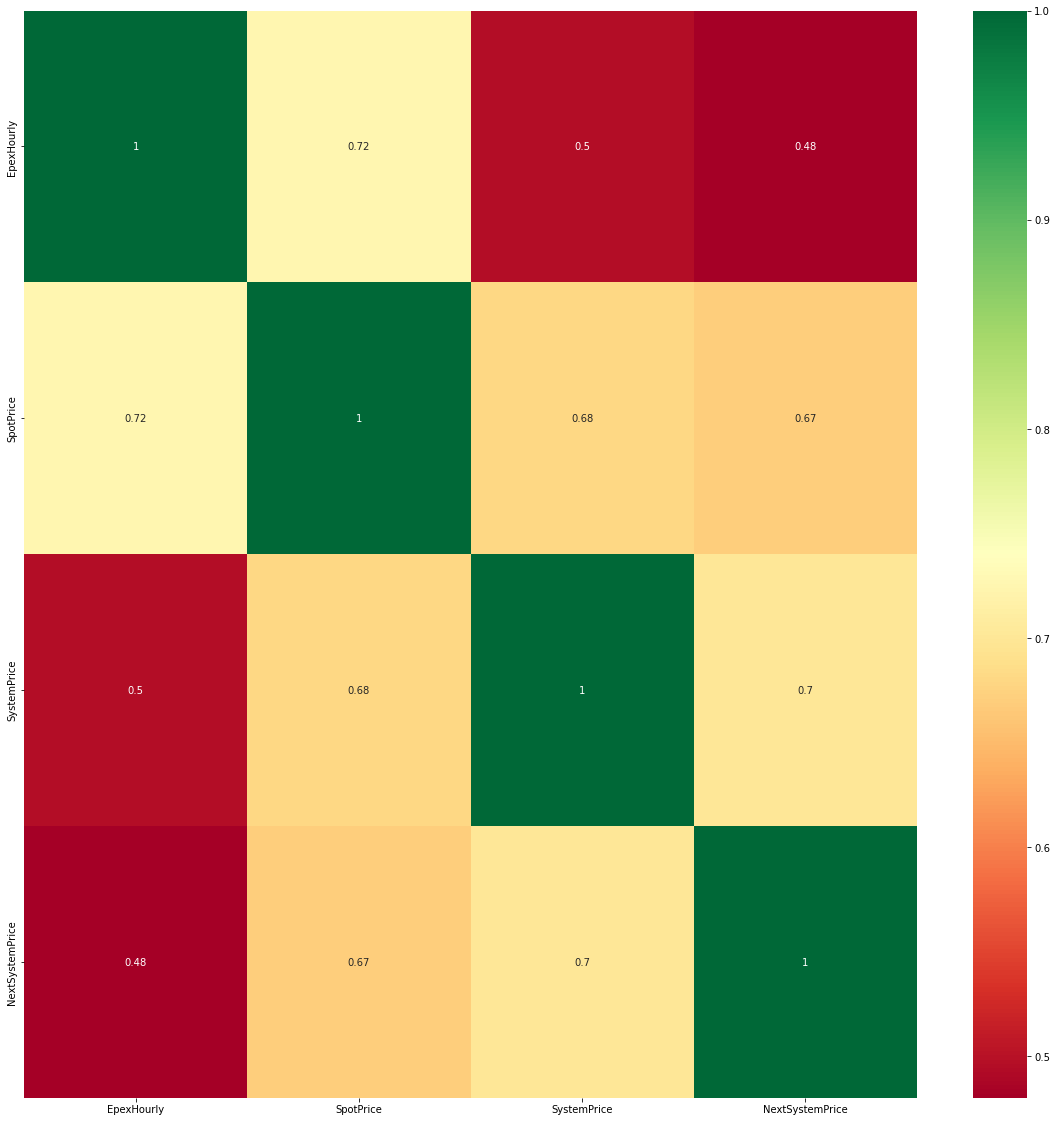

In [178]:
import seaborn as sns

data = df[["EpexHourly", "SpotPrice", "SystemPrice","NextSystemPrice"]]
X_cor = data.iloc[:,[0,1,2]]  #independent columns
y_cor = data.iloc[:,3]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## 3. More feature preparation 

### i.Make seperate columns for year, month, day

In [179]:
dates = df["Date"]
day = []
month = []
year = []

for i in range(len(dates)):
    day += [int(dates[i][0:2])]
    month += [int(dates[i][3:5])]
    year += [int(dates[i][6:10])]

##### Remove date column and add these as columns

In [180]:
df.drop("Date",axis=1,inplace=True)
df["Day"] = day
df["Month"] = month
df["Year"] = year
df.head(1)

Period  EpexHourly  SpotPrice  SystemPrice  ImbalanceVolume  Temp  \
0       1       33.41      40.45        52.25         195.4258   9.0   

   NextSystemPrice  Day  Month  Year  
0             51.9    8      4  2019

##### Reorder columns

In [181]:
df = df[['Year', 'Month','Day', 'Period', 'EpexHourly', 'SpotPrice', 'SystemPrice', 'ImbalanceVolume',
       'Temp', 'NextSystemPrice']]
df.head(1)

Year  Month  Day  Period  EpexHourly  SpotPrice  SystemPrice  \
0  2019      4    8       1       33.41      40.45        52.25   

   ImbalanceVolume  Temp  NextSystemPrice  
0         195.4258   9.0             51.9

### iii. Scale Non-Date Data with Standard Scaler

In [182]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [183]:
scaled_features = df.copy()
col_names = ["Period","EpexHourly","SpotPrice","SystemPrice","ImbalanceVolume","Temp"]
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [184]:
scaled_features[col_names] = features
scaled_features.head(1)

Year  Month  Day    Period  EpexHourly  SpotPrice  SystemPrice  \
0  2019      4    8 -1.696335      -0.456  -0.299587    -0.099008   

   ImbalanceVolume      Temp  NextSystemPrice  
0         0.541768 -0.655357             51.9

### ii.Seperate features and labels

In [185]:
x_df = df.drop("NextSystemPrice",axis=1)
y_df = df["NextSystemPrice"].to_frame()

In [186]:
x_df.info()
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47184 entries, 0 to 47183
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             47184 non-null  int64  
 1   Month            47184 non-null  int64  
 2   Day              47184 non-null  int64  
 3   Period           47184 non-null  int64  
 4   EpexHourly       47184 non-null  float64
 5   SpotPrice        47184 non-null  float64
 6   SystemPrice      47184 non-null  float64
 7   ImbalanceVolume  47184 non-null  float64
 8   Temp             47184 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 3.2 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47184 entries, 0 to 47183
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NextSystemPrice  47184 non-null  float64
dtypes: float64(1)
memory usage: 368.8 KB


##### Fill in NAN Data in labels

In [187]:
y_df.fillna(value= y_df["NextSystemPrice"].median(),inplace=True)

In [188]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47184 entries, 0 to 47183
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NextSystemPrice  47184 non-null  float64
dtypes: float64(1)
memory usage: 368.8 KB


### iv.Correlation matrix for whole dataframe

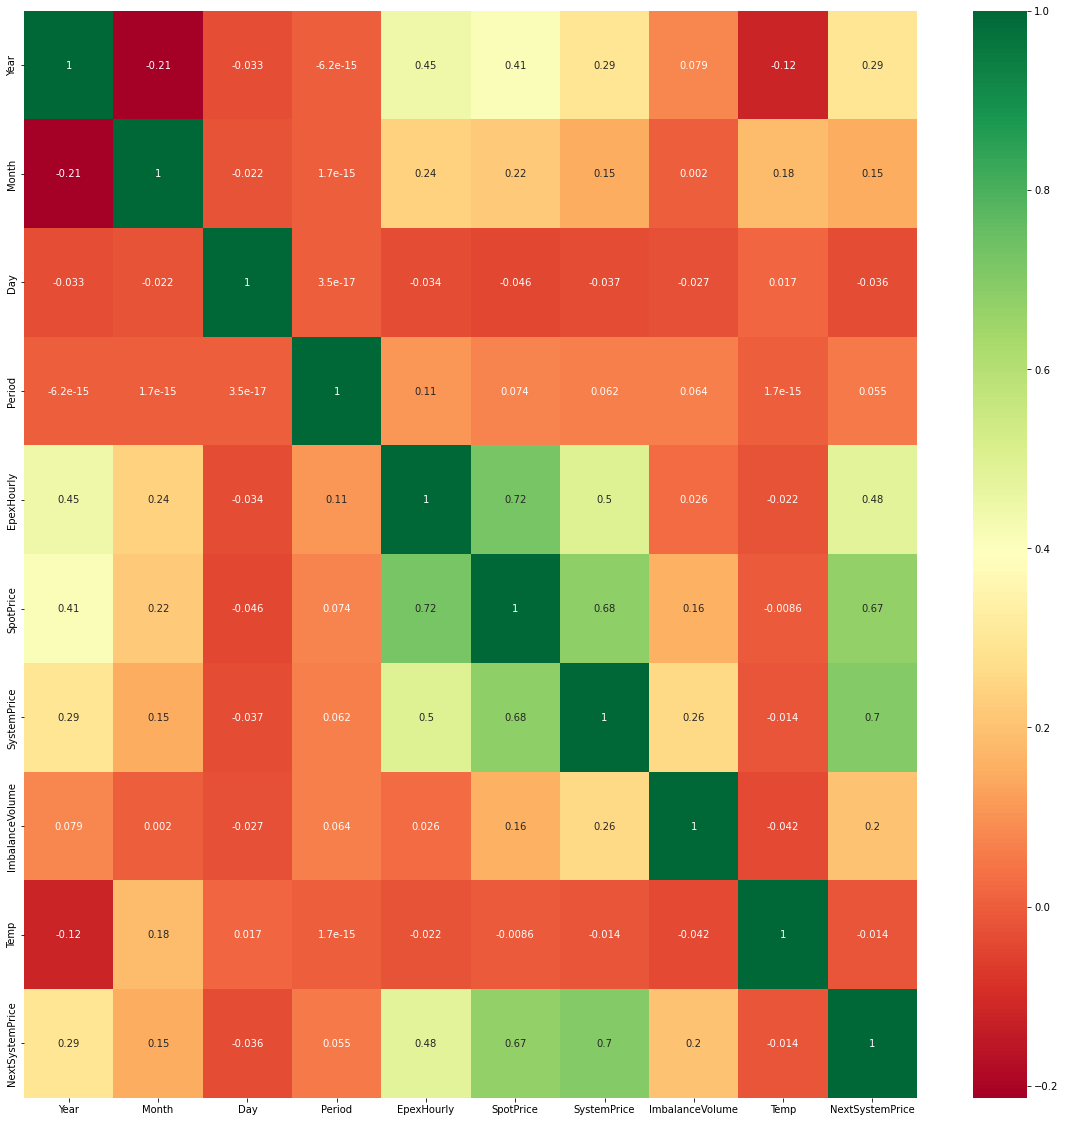

In [189]:
data = df
X_cor = data.iloc[:,[0,1,2,3,4,5,6]]  #independent columns
y_cor = data.iloc[:,7]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### iv. Split into test train sets

In [204]:
X = x_df.to_numpy()
Y = y_df.to_numpy()

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Save these as csv

In [206]:
np.save("X_train",X_train)
np.save("Y_train",Y_train)
np.save("X_test",X_test)
np.save("Y_test",Y_test)

# 4.Apply ML

##  i.Run Linear Regression Model

##### Fit Model

In [208]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

##### Import metric and calculate mse

In [209]:
from sklearn.metrics import mean_squared_error
Y_train_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, Y_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

63.45598190685875

Very poor performance

In [210]:
lin_reg.coef_

array([[ 3.43013732,  0.56431462, -0.02091173, -0.02068829,  0.02512883,
         0.47360038,  0.4084637 ,  0.01299131, -0.06292201]])

Test with test set

In [212]:
Y_test_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(Y_test, Y_test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70.42201410659071

Performance slightly worse on test set

May need regularization

## ii.Decision Tree 

##### Fit Model

In [213]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

##### Check accuracy

In [214]:
Y_train_predictions = tree_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, Y_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

1.7253915896639927e-31

Very accurate, probably overfitting

In [215]:
Y_test_predictions = tree_reg.predict(X_test)
lin_mse = mean_squared_error(Y_test, Y_test_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

11298.020174981186

Amazing overfitting

### Recommendations for further work to improve predictive model

Check correlation matrix

In [222]:
current_df = scaled_features.copy()
current_df.corr()["NextSystemPrice"]

Year               0.293834
Month              0.149862
Day               -0.036445
Period             0.054667
EpexHourly         0.480205
SpotPrice          0.669663
SystemPrice        0.701251
ImbalanceVolume    0.202671
Temp              -0.014352
NextSystemPrice    1.000000
Name: NextSystemPrice, dtype: float64

- Above matrix suggest we need to drop day and possibly temperature

- This is likely because the day of month does not hold any important informaiton not contained in the month column, and temperature is not a good predictor of solar output, 

- Will need to add datapoints that provide information on solar irradiation, cloudiness, and wind speed, ideally in the form of forecasts for the next 30 mins

- May have to timeshift the EPEX Prices to get a more relevant metric

- Although year seems like a relevant metric, the ups and downs in energy prices in the past three years may be peculiar and may cause overfitting when predicting future years

- Need to apply regularization to the ML model

- May add interaction terms

- May try more complicated ML methods than regression, and less complicated ones than decision trees ( or at least a regularized decision tree)